In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [9]:
data = pd.read_csv('data/accidental-deaths-in-usa-monthly.csv')
data.head()

,Month,"Accidental deaths in USA: monthly, 1973 ? 1978"
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017


In [10]:
data['Month'] = pd.to_datetime(data['Month'])
data.head()

,Month,"Accidental deaths in USA: monthly, 1973 ? 1978"
0,1973-01-01,9007
1,1973-02-01,8106
2,1973-03-01,8928
3,1973-04-01,9137
4,1973-05-01,10017


In [11]:
dates = data['Month'].values
accidental_deaths = data['Accidental deaths in USA: monthly, 1973 ? 1978'].values

X_train, X_test, y_train, y_test = train_test_split(dates, accidental_deaths, test_size=0.2, random_state=42)

In [12]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [16]:
model = SVR(kernel='rbf', gamma=0.5, C=10, epsilon = 0.05)
model.fit(X_train, y_train)

/home/khalboy10/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, epsilon=0.05, gamma=0.5)

In [17]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1188168.0810816165


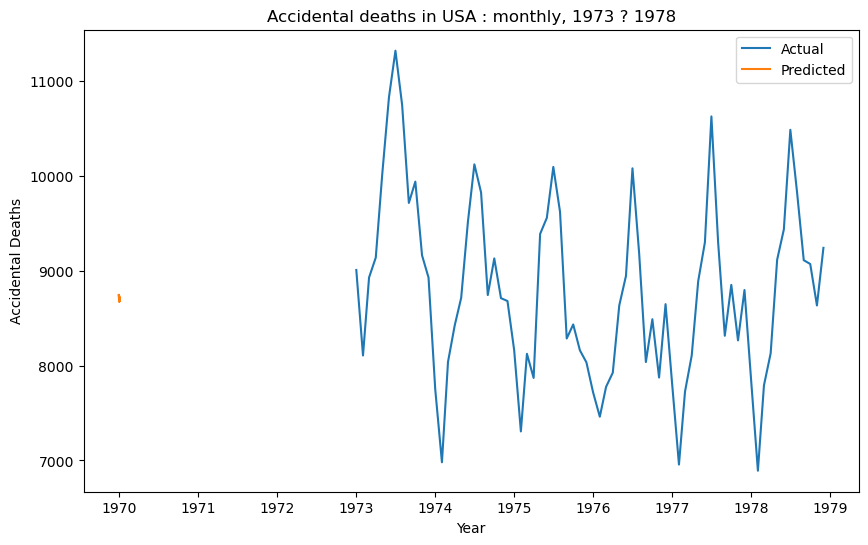

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(dates, accidental_deaths)
plt.plot(X_test, y_pred)
plt.legend(['Actual','Predicted'])
plt.xlabel('Year')
plt.ylabel('Accidental Deaths')
plt.title('Accidental deaths in USA : monthly, 1973 ? 1978')
plt.show()